### Importing Libraries

In [112]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

print(tf.__version__)

2.12.0


#### Loading train and test data

In [14]:
root_data_dir = './drive/MyDrive/IIT-J/Semester1/Assignments/ML/Assignment-Fractal3/data/GurNum/'
train_data_dir = root_data_dir + 'train'
test_data_dir = root_data_dir + 'val'

###### Loading data into dataframe

In [47]:
def read_folder_class_data(folder_path):
  df = pd.DataFrame(columns = ["ImageName", "Class"])
  for class_dir in os.listdir(folder_path):
    for image in os.listdir(folder_path+"/"+class_dir):
      df.loc[len(df)+1] = [image, class_dir]
  return df

In [48]:
train_df = read_folder_class_data(train_data_dir)
test_df = read_folder_class_data(test_data_dir)

In [49]:
print("Number of training records: {}".format(len(train_df)))
print("Number of testing records: {}".format(len(test_df)))

Number of training records: 1000
Number of testing records: 178


In [56]:
print("Train Data Class Distribution: ")
train_df.Class.value_counts()

Train Data Class Distribution: 


9    100
8    100
7    100
6    100
5    100
4    100
3    100
2    100
1    100
0    100
Name: Class, dtype: int64

###### Loading image data and labels into arrays

In [79]:
# Custom function to 
def read_image(imagePath):
  img = Image.open(imagePath).convert("L")
  return np.array(img)

In [80]:
train_images = train_df.apply(lambda r: read_image(train_data_dir + "/" + r['Class'] + "/" + r['ImageName']) , axis=1).tolist()
test_images = test_df.apply(lambda r: read_image(test_data_dir + "/" + r['Class'] + "/" + r['ImageName']) , axis=1).tolist()

In [81]:
train_images = np.array(train_images)
test_images = np.array(test_images)

In [88]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [95]:
train_images.shape

(1000, 32, 32)

In [101]:
train_labels = np.array(train_df['Class'].tolist()).astype(int)
test_labels = np.array(test_df['Class'].tolist()).astype(int)

###### Randomly checking the dataset

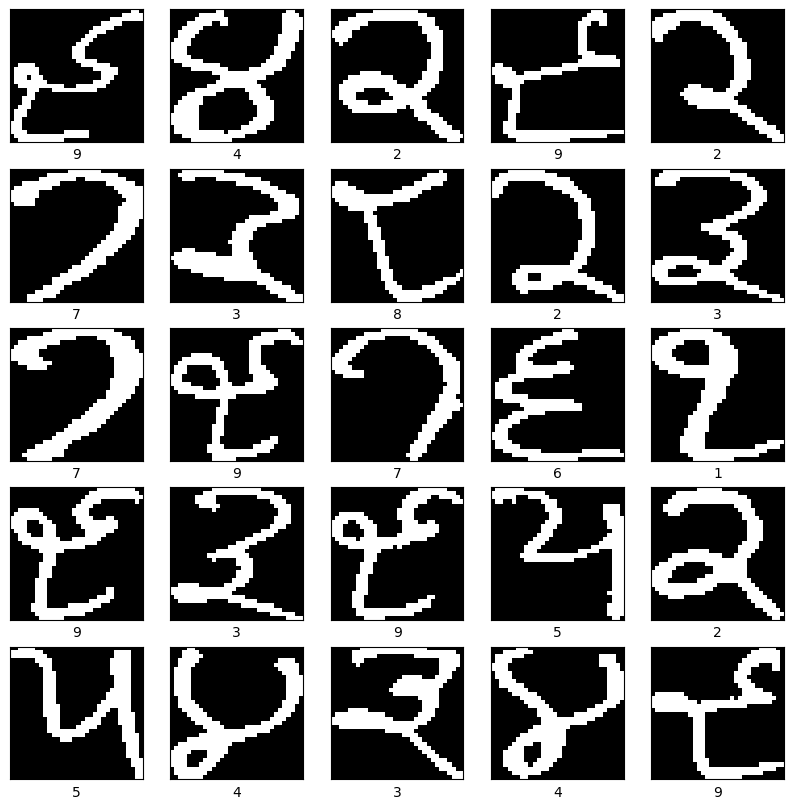

In [94]:
plt.figure(figsize=(10,10))
random_indices = np.random.randint(low=0, high=len(train_images), size=25)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    random_index = random_indices[i]
    plt.imshow(train_images[random_index], cmap=plt.cm.binary)
    plt.xlabel(train_labels[random_index])
plt.show()

#### Building the model:

In [371]:
def define_model():
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(32, 32)),
      tf.keras.layers.Dense(128, activation='relu', kernel_initializer="he_normal"),
      tf.keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal"),
      tf.keras.layers.Dense(32, activation='relu', kernel_initializer="he_normal"),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(10)
  ])
  return model

In [375]:
def compile_model(model):
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=3e-4),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [376]:
model = define_model()
compile_model(model)
model.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_59 (Flatten)        (None, 1024)              0         
                                                                 
 dense_208 (Dense)           (None, 128)               131200    
                                                                 
 dense_209 (Dense)           (None, 64)                8256      
                                                                 
 dense_210 (Dense)           (None, 32)                2080      
                                                                 
 dropout_27 (Dropout)        (None, 32)                0         
                                                                 
 dense_211 (Dense)           (None, 10)                330       
                                                                 
Total params: 141,866
Trainable params: 141,866
Non-t

#### Training the model

In [377]:
no_epoch = 100
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=no_epoch)

Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 2.2186 - accuracy: 0.2320 - val_loss: 1.8806 - val_accuracy: 0.5056
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 1.6320 - accuracy: 0.4720 - val_loss: 1.3413 - val_accuracy: 0.7528
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 1.2141 - accuracy: 0.6110 - val_loss: 0.9913 - val_accuracy: 0.7753
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 1.0154 - accuracy: 0.6780 - val_loss: 0.7617 - val_accuracy: 0.8090
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.8040 - accuracy: 0.7540 - val_loss: 0.6344 - val_accuracy: 0.8371
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.7044 - accuracy: 0.7810 - val_loss: 0.5219 - val_accuracy: 0.8876
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6039 - accuracy: 0.8050 - val_loss: 0.4245 - val_accuracy: 0.9045
Epoch 8/100


#### Evaluating the model

In [378]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

6/6 - 0s - loss: 0.1821 - accuracy: 0.9663 - 52ms/epoch - 9ms/step

Test accuracy: 0.966292142868042


#### Visualizing training graph

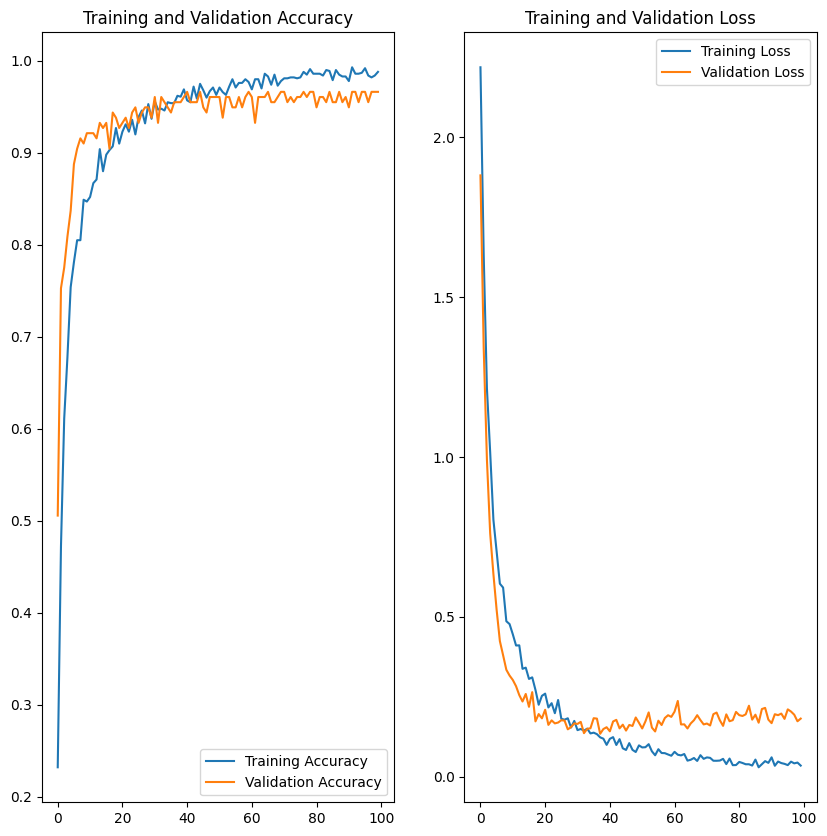

In [382]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(no_epoch)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [388]:
root_model_dir = "./Q2_GurumukhiHandwrittenDigitClassification/saved_model/"
current_model_dir = root_model_dir+"GurNum_MLP/"
model.save(current_model_dir)
with open(current_model_dir+"model_config.json", "w") as f:
  f.write(model.to_json())

In [389]:
rm -r my_model